# Wrangle and Analyse of WeRateDogs's Tweets
<pre>
Udacity - Nanodegree Data Analyst
Author: Leonardo Simões
</pre>

## Table of Contents
- [Introduction](#intro)
- [Data Wrangling](#data_wrangling) 
- [Gather](#gather)
- [Assessing of Tidiness](#assessing_tidiness)
- [Clean of Tidiness](#clean_tidiness)
- [Assessing of Quality](#assessing_quality)
- [Clean of Data Quality](#clean_quality)
- [Exploratory Analysis](#eda)

<a id='intro'></a>
## Introduction

The dataset used is a Twitter user's tweet log called @dog_rates or WeRateDogs. This Twitter profile classifies dogs by assigning notes and kind comments. The main objective of this project is to evaluate and clean the data set provided, but some analyzes and visualizations will also be carried out.


In [132]:
import numpy as np
import pandas as pd
import json

import requests
import os
from functools import reduce

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

<a id='data_wrangling'></a>
## Data Wrangling

The assessing and cleaning steps will be divided into two each, for Data Organization and Data Quality.

<a id='gather'></a>
### Gather

* Dataset 1:

In [133]:
#Open dataset 1
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


* Dataset 2:

In [134]:
#Dataset 2 url and name information
url_tsv = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
name_tsv = 'image-predictions.tsv'

In [135]:
#Download dataset 2 programmatically
response = requests.get(url_tsv)
with open(name_tsv, 'wb') as file:
        file.write(response.content)

In [136]:
#Open dataset 2
df2 = pd.read_csv(name_tsv, sep='\t')
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Dataset 3:

In [137]:
#Reads JSON file with .txt extension
with open('tweet-json.txt','r') as json_file:
    lines = json_file.readlines()
    lines = [line.strip("\n") for line in lines]
    lines = ''.join(lines).split('}{')
    data_json = [json.loads('%s}' % line) if idx == 0 else 
            json.loads('{%s' % line) if idx == len(lines)-1 
            else json.loads('{%s}' % line) 
            for idx, line in enumerate(lines)]

In [138]:
#Open dataset 3
df3 = pd.DataFrame(data_json)
df3.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


<a id='assessing_tidiness'></a>
### Assessing of Tidiness

First, the verification will be only of the structures (rows, size, columns) of the data frames.

In [139]:
#Number of lines / observations of each dataset
df.shape[0], df2.shape[0], df3.shape[0]

(2356, 2075, 2354)

In [140]:
#Number of columns of each dataset
df.shape[1], df2.shape[1], df3.shape[1]

(17, 12, 31)

Checking the columns of the dataframes:

In [141]:
#Features (columns) of each dataset
df.columns, df2.columns, df3.columns

(Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
        'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
        'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
        'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
       dtype='object'),
 Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
        'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
       dtype='object'),
 Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
        'display_text_range', 'entities', 'extended_entities', 'source',
        'in_reply_to_status_id', 'in_reply_to_status_id_str',
        'in_reply_to_user_id', 'in_reply_to_user_id_str',
        'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
        'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
        'favorited', 'retweeted', 'possibly_sensitive',
        'possibly_sensitive_appealable', 'la

- All of these columns and information should not be separated into three different dataframes.
- Most df3 columns are not absolutely necessary, as specified in the project proposal.

Checking the columns common to dataframes:

In [142]:
#Common columns between df and df2
np.intersect1d(df.columns.values, df2.columns.values)

array(['tweet_id'], dtype=object)

In [143]:
#Common columns between df and df3
np.intersect1d(df.columns.values, df3.columns.values)

array(['in_reply_to_status_id', 'in_reply_to_user_id', 'source'],
      dtype=object)

In [144]:
#Common columns between df2 and df3
np.intersect1d(df2.columns.values, df3.columns.values)

array([], dtype=object)

- There should be a column in df3 with the name 'tweet_id'. The column is present with the name 'id'.

Checking the 'doggo', 'floofer', 'pupper', 'puppo' columns:

In [145]:
df.sample(5)[['doggo', 'floofer', 'pupper', 'puppo']].head()

,doggo,floofer,pupper,puppo
58,None,None,None,None
248,doggo,None,None,None
1570,None,None,None,None
1385,None,None,None,None
668,None,None,None,None


In [146]:
df['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [147]:
df['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [148]:
df['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [149]:
df['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

- The 'doggo', 'floofer', 'pupper', 'puppo' columns should not exist, at least, if they were dummies variables to train a machine learning model. There should only be one column for 'stages' for these values.

In [150]:
#Number of instances that have at least 1 stage
((df['doggo'] == "doggo") + (df['floofer']=="floofer") + (df['pupper']=='pupper') + (df['puppo']=='puppo')).value_counts()

False    1976
True      380
dtype: int64

In [151]:
#Number of instances that have exactly 1 stage
((df['doggo'] == "doggo") ^ (df['floofer']=="floofer") ^ (df['pupper']=='pupper') ^ (df['puppo']=='puppo')).value_counts()

False    1990
True      366
dtype: int64

- In 380 lines there is at least one stage. There are only 1 stage on 366 lines. In 14 lines there are 2 or more stages.

#### Tidiness:
- Discard unnecessary columns in df3_copy.
- The 'id' column in df3_copy should be 'tweet_id'.
- All columns and information should be on a single dataframe.
- A new 'stages' column must be created.
- The 'doggo', 'floofer', 'pupper', 'puppo' columns must be removed.

<a id='clean_tidiness'></a>
### Clean (Tidiness)

In [152]:
df1_copy, df2_copy, df3_copy = df.copy(), df2.copy(), df3.copy()

#### Discard unnecessary columns in df3_copy.

#### Define
- Remove unnecessary columns in df3_copy, leaving only 'id', 'retweet_count', 'favorite_count':

In the project proposal it was defined that, at least, the columns 'id', 'retweet_count', 'favorite_count' would be necessary.

#### Code

In [153]:
df3_copy = df3_copy[['id', 'retweet_count', 'favorite_count']]

#### Test

In [154]:
df3_copy.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### The 'id' column in df3_copy should be 'tweet_id'.
#### Define
- Rename the 'id' column to 'tweet_id' in df3_copy:

#### Code

In [155]:
df3_copy.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test

In [156]:
assert 'tweet_id' in df3_copy.columns and 'id' not in df3_copy.columns

In [157]:
df3_copy.head()['tweet_id']

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: int64

#### All columns and information should be on a single dataframe. (1)
#### Define
- Joining the df1_copy and df2_copy dataframes:

#### Code

In [158]:
df_clean = pd.merge(df1_copy, df2_copy, on = 'tweet_id', how = 'left')

### Test

In [159]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [160]:
df_clean.shape[1]

28

In [161]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

#### All columns and information should be on a single dataframe. (2)
#### Define
- Joining the df_clean (df_copy and df2_copy) and df3_copy dataframes:

#### Code

In [162]:
df_clean = pd.merge(df_clean, df3_copy, on = 'tweet_id', how = 'left')

#### Test

In [163]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0


In [164]:
df_clean.shape[1]

30

In [165]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

#### A new 'stages' column must be created.
#### Define
Create a stage column for the values ​​'doggo', 'floofer', 'pupper', 'puppo'.

#### Code

In [166]:
is_doggo = df_clean.doggo == 'doggo'
is_floofer = df_clean.floofer == 'floofer'
is_pupper = df_clean.pupper == 'pupper'
is_puppo = df_clean.puppo == 'puppo'

In [167]:
#Creating 'stages' column with default value 'none'
df_clean['stages'] = 'none'

In [168]:
#1 stage
df_clean.loc[is_doggo, 'stages'] = 'doggo'
df_clean.loc[is_floofer, 'stages'] = 'floofer'
df_clean.loc[is_pupper, 'stages'] = 'pupper'
df_clean.loc[is_puppo, 'stages'] = 'puppo'

In [169]:
#2 stages
df_clean.loc[is_doggo & is_floofer, 'stages'] = 'doggo, floofer'
df_clean.loc[is_doggo & is_pupper,'stages'] = 'doggo, pupper'
df_clean.loc[is_doggo & is_puppo, 'stages'] = 'doggo, puppo'
df_clean.loc[is_floofer & is_pupper, 'stages'] = 'floofer, pupper'
df_clean.loc[is_floofer & is_puppo, 'stages'] = 'floofer, puppo'
df_clean.loc[is_pupper & is_puppo, 'stages'] = 'pupper, puppo'

In [170]:
#3 stages
df_clean.loc[is_doggo & is_floofer & is_pupper, 'stages'] = 'doggo, floofer, pupper'
df_clean.loc[is_doggo & is_floofer & is_puppo, 'stages'] = 'doggo, floofer, puppo'
df_clean.loc[is_doggo & is_pupper & is_puppo, 'stages'] = 'doggo, pupper, puppo'
df_clean.loc[is_floofer & is_pupper & is_puppo, 'stages'] = 'floofer, pupper, puppo'

In [171]:
#4 stages
df_clean.loc[is_doggo & is_floofer & is_pupper & is_puppo, 'stages'] = 'doggo, floofer, pupper, puppo'

#### Test

In [172]:
df_clean.sample(5)['stages']

2138    none
1405    none
1881    none
1108    none
1557    none
Name: stages, dtype: object

In [173]:
assert 'stages' in df_clean.columns.values

In [174]:
assert df_clean['stages'].isna().sum() == 0

In [175]:
df_clean['stages'].value_counts()

none              1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: stages, dtype: int64

#### The 'doggo', 'floofer', 'pupper', 'puppo' columns must be removed.
#### Define 
Remove the 'doggo', 'floofer', 'pupper', 'puppo' columns.

#### Code

In [176]:
df_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test

In [177]:
assert 'doggo' not in df_clean.columns.values

In [178]:
assert 'floofer' not in df_clean.columns.values

In [179]:
assert 'pupper' not in df_clean.columns.values

In [180]:
assert 'puppo' not in df_clean.columns.values

* The dataframes df, df2 and df3 will no longer be used, so they can be deleted.

In [181]:
del df, df2, df3 

* The dataframes df1_copy, df2_copy and df3_copy will no longer be used, so they can be deleted.

In [182]:
del df1_copy, df2_copy, df3_copy 

<a id='assessing_quality'></a>
### Assessing of Data Quality

* Checking general dataframe information:

In [183]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  jpg_url                     2075 

* Checking values of numeric features:

In [184]:
#Checking statistics for quantitative numerical features
num_columns = ['rating_numerator', 'rating_denominator','img_num','p1_conf',
               'p2_conf', 'p3_conf', 'retweet_count', 'favorite_count']
df_clean[num_columns].describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2356.000000,2356.000000,2075.000000,2075.000000,2.075000e+03,2.075000e+03,2354.000000,2354.000000
mean,13.126486,10.455433,1.203855,0.594548,1.345886e-01,6.032417e-02,3164.797366,8080.968564
std,45.876648,6.745237,0.561875,0.271174,1.006657e-01,5.090593e-02,5284.770364,11814.771334
min,0.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,0.000000
25%,10.000000,10.000000,1.000000,0.364412,5.388625e-02,1.622240e-02,624.500000,1415.000000
50%,11.000000,10.000000,1.000000,0.588230,1.181810e-01,4.944380e-02,1473.500000,3603.500000
75%,12.000000,10.000000,1.000000,0.843855,1.955655e-01,9.180755e-02,3652.000000,10122.250000
max,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


* Checking which columns have missing values (NaN):

In [185]:
df_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
jpg_url                        281
img_num                        281
p1                             281
p1_conf                        281
p1_dog                         281
p2                             281
p2_conf                        281
p2_dog                         281
p3                             281
p3_conf                        281
p3_dog                         281
retweet_count                    2
favorite_count                   2
stages                           0
dtype: int64

* Displaying columns have missing values (NaN) and the amount of these values:

In [186]:
#Count of NaN values more than 0
na_values = df_clean.isna().sum()
na_values = na_values[na_values > 0]
na_values

in_reply_to_status_id         2278
in_reply_to_user_id           2278
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
jpg_url                        281
img_num                        281
p1                             281
p1_conf                        281
p1_dog                         281
p2                             281
p2_conf                        281
p2_dog                         281
p3                             281
p3_conf                        281
p3_dog                         281
retweet_count                    2
favorite_count                   2
dtype: int64

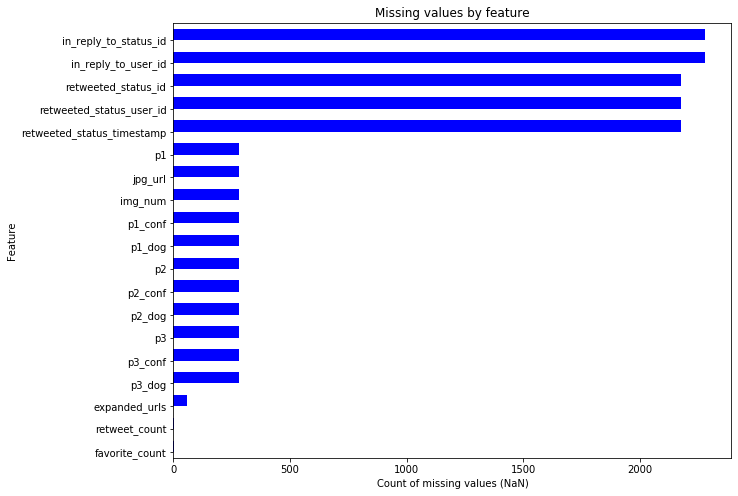

In [187]:
#Plot of the NaN values per feature
plt.figure(figsize=(10,8))
na_values.sort_values().plot(kind='barh', position=0, color='blue')
plt.title('Missing values by feature');
plt.xlabel('Count of missing values (NaN)');
plt.ylabel('Feature');

Columns with NaN values must be treated in some way, like filling with some value.

* Checking for duplicate whole lines:

In [188]:
df_clean.duplicated().sum()

0

No duplicate lines.

* Evaluating the 'source' column:

In [189]:
df_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

The values in the source column will be the values between the anchor tags.

* Evaluating the 'rating_denominator' column:

In [190]:
df_clean.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [191]:
df_clean.query('rating_denominator == 0')[['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
313,960,0


The value of 'rating_denominator' must not be 0, because calculating the grade is not feasible with that.

* Evaluating the 'stage' column:

In [192]:
df_clean['stages'].value_counts()

none              1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: stages, dtype: int64

* Evaluating the 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' columns:

In [193]:
p_columns = ['stages', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']

In [194]:
df_clean[p_columns].head()

,stages,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,none,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,none,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,none,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,none,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,none,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [195]:
df_clean.query('p1.isnull()', engine='python')[p_columns].head()

,stages,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
30,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
#Query used to check the number of times that all columns in p_columns are NaN
query_ps_is_null = 'p1.isnull() & p2.isnull() & p3.isnull() & '
query_ps_is_null = query_ps_is_null + 'p1_conf.isnull() & p2_conf.isnull() & p3_conf.isnull() & '
query_ps_is_null = query_ps_is_null + 'p1_dog.isnull() & p2_dog.isnull() & p3_dog.isnull()'
query_ps_is_null

'p1.isnull() & p2.isnull() & p3.isnull() & p1_conf.isnull() & p2_conf.isnull() & p3_conf.isnull() & p1_dog.isnull() & p2_dog.isnull() & p3_dog.isnull()'

In [197]:
#number of times that all columns in p_columns are NaN
len(df_clean.query(query_ps_is_null, engine='python'))

281

When one of the columns 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' is NaN, the others are also.

* Evaluating the 'retweet_count' and 'favorite_count' columns:

In [198]:
df_clean[['retweet_count', 'favorite_count']].describe().min()

retweet_count     0.0
favorite_count    0.0
dtype: float64

In [199]:
df_clean[['retweet_count', 'favorite_count']].isna().sum()

retweet_count     2
favorite_count    2
dtype: int64

The 'retweet_count', 'favorite_count', as seen above had NaN values twice each. The smallest value for these columns is 0.

In [200]:
df_clean['retweet_count'].dtype

dtype('float64')

In [201]:
df_clean['favorite_count'].dtype

dtype('float64')

These columns with suffix 'count' should not be of type float, but int.

* Evaluating the 'img_num' column:

In [202]:
df_clean['img_num'].min(), df_clean['img_num'].max()

(1.0, 4.0)

In [203]:
df_clean['img_num'].unique()

array([ 1.,  2.,  3., nan,  4.])

In [204]:
df_clean['img_num'].dtype

dtype('float64')

This column with suffix 'num' should not be of type float, but int. The column values are {1., 2., 3. and 4.} but should be {1, 2, 3, 4}.

#### Quality:

- The 'rating_denominator' column must not have a value of 0.
- The values in the source column will be the values between the anchor tags.
- The 'retweet_count' column must have its NaN values filled in.
- The 'favorite_count' column must have its NaN values filled in.
- Unrated tweets, considering columns p1, p2 and p3, should be removed.
- The column type 'img_num' should be int64 and not float64.
- The column type 'favorite_count' should be int64 and not float64.
- The column type 'retweet_count' should be int64 and not float64.
- Only lines that do not represent a retweet should be kept.
- If confirmed that the tweets are not retweets, the columns for retweets are unnecessary.

<a id='clean_quality'></a>
### Clean of Data Quality

#### The 'rating_denominator' column must not have a value of 0.
#### Define
Replace the 0 values of rating_denominator with 1.

#### Code

In [205]:
df_clean.loc[df_clean.rating_denominator == 0, 'rating_denominator'] = 1

#### Test

In [206]:
assert 0 not in df_clean.rating_denominator.unique()

#### The values in the source column will be the values between the anchor tags.
#### Define
Change the values in 'source' to just the desired part of the string.

#### Code

In [207]:
old_source = '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
new_source = 'Twitter for iPhone'
df_clean.loc[df_clean.source == old_source, 'source'] = new_source

In [208]:
old_source = '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'
new_source = 'Vine - Make a Scene'
df_clean.loc[df_clean.source == old_source, 'source'] = new_source

In [209]:
old_source = '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
new_source = 'Twitter Web Client'
df_clean.loc[df_clean.source == old_source, 'source'] = new_source

In [210]:
old_source = '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'
new_source = 'TweetDeck'
df_clean.loc[df_clean.source == old_source, 'source'] = new_source

#### Test

In [211]:
df_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

#### The 'retweet_count' column must have its NaN values filled in.
#### Define

Fill NaN values of The 'retweet_count' with 0

#### Code

In [212]:
df_clean['retweet_count'].fillna(0, inplace=True)

#### Test

In [213]:
assert df_clean['retweet_count'].isna().sum() == 0

#### The 'favorite_count' column must have its NaN values filled in.
#### Define

Fill NaN values of The 'favorite_count' with 0

#### Code

In [214]:
df_clean['favorite_count'].fillna(0, inplace=True)

#### Test

In [215]:
assert df_clean['favorite_count'].isna().sum() == 0

#### Unrated tweets, considering columns p1, p2 and p3, should be removed.

#### Define
Drop the lines where p1 is NaN. This should make the columns 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' do not have NaN values.

#### Code

In [216]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0,none
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0,none
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0,none
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0,none
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0,none


In [217]:
p_columns = ['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
df_clean.dropna(subset=p_columns, inplace=True)

#### Test

In [218]:
p_columns = ['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
for column in p_columns:
    assert df_clean[column].isna().sum() == 0

In [219]:
df_clean.shape

(2075, 27)

#### The column type 'img_num' should be int64 and not float64.
#### Define
Change column type 'img_num' from float64 to int64.

#### Code

In [220]:
df_clean['img_num'] = df_clean['img_num'].astype(np.int64)

#### Test

In [221]:
assert df_clean['img_num'].dtype == np.dtype(np.int64)

#### The column type 'favorite_count' should be int64 and not float64.

#### Define
Change column type 'favorite_count' from float64 to int64.

#### Code

In [222]:
df_clean['favorite_count'] = df_clean['favorite_count'].astype(np.int64)

#### Test

In [223]:
assert df_clean['favorite_count'].dtype == np.dtype(np.int64)

#### The column type 'retweet_count' should be int64 and not float64.

#### Define
Change column type 'retweet_count' from float64 to int64.

#### Code

In [224]:
df_clean['retweet_count'] = df_clean['retweet_count'].astype(np.int64)

#### Test

In [225]:
assert df_clean['retweet_count'].dtype == np.dtype(np.int64)

#### Only lines that do not represent a retweet should be kept.
#### Define
Remove lines where 'retweeted_status_id' is not null.

#### Code

In [226]:
df_clean = df_clean[df_clean.retweeted_status_id.isnull()]

#### Test

In [227]:
assert df_clean.retweeted_status_id.isnull().sum() == df_clean.shape[0]

In [228]:
df_clean.retweeted_status_id.value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

#### After confirming that tweets are not retweets, columns for retweets are unnecessary.

#### Define

Remove 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp' columns.

In [229]:
df_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], inplace=True)

#### Test

In [230]:
assert 'retweeted_status_id' not in df_clean.columns

In [231]:
assert 'retweeted_status_user_id' not in df_clean.columns

In [232]:
assert 'retweeted_status_timestamp' not in df_clean.columns

### Save dataframe to .csv

In [233]:
df_clean.to_csv('twitter_archive_master.csv', index=False)

<a id='eda'></a>
## Exploratory Analysis

Análise - 3 informações e 1 visualização valores das notas, frequências de raças 

In [234]:
df_clean['rating'] = df_clean['rating_numerator']/df_clean['rating_denominator']

In [235]:
#Numeric columns that are quantitative
numeric_columns = ['rating', 'rating_numerator','rating_denominator','img_num','p1_conf','p2_conf','p3_conf',
                   'retweet_count','favorite_count']

### Which tweet got the highest score?

In [236]:
#Highest rating
df_clean['rating'].max()

177.6

In [237]:
#Highest rated Tweet
highest_grade_tweet = df_clean[df_clean['rating'] == df_clean['rating'].max()]
highest_grade_tweet

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stages,rating
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,...,sunglasses,0.080822,False,sunglass,0.050776,False,2772,5569,none,177.6


Below are some of the characteristics of the highest rated tweet:

In [238]:
highest_grade_tweet['name'].values[0]

'Atticus'

In [239]:
highest_grade_tweet['text'].values[0]

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [240]:
highest_grade_tweet['jpg_url'] 

979    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: jpg_url, dtype: object

In [241]:
highest_grade_tweet['expanded_urls'].values[0]

'https://twitter.com/dog_rates/status/749981277374128128/photo/1'

In [242]:
highest_grade_tweet['retweet_count'].values[0]

2772

In [243]:
highest_grade_tweet['favorite_count'].values[0]

5569

In [244]:
#Classification of the p1 algorithm and its confidence in the result:
highest_grade_tweet['p1'].values[0], highest_grade_tweet['p1_conf'].values[0]

('bow_tie', 0.533941)

In [245]:
#Classification of the p1 algorithm and its confidence in the result:
highest_grade_tweet['p2'].values[0], highest_grade_tweet['p2_conf'].values[0]

('sunglasses', 0.0808222)

In [246]:
#Classification of the p1 algorithm and its confidence in the result:
highest_grade_tweet['p3'].values[0], highest_grade_tweet['p3_conf'].values[0]

('sunglass', 0.0507762)

### How are the measurements of each stage?

In [247]:
stages_count = df_clean['stages'].value_counts()
stages_count

none              1688
pupper             203
doggo               63
puppo               22
doggo, pupper        9
floofer              7
doggo, floofer       1
doggo, puppo         1
Name: stages, dtype: int64

In [248]:
sum_stages = stages_count.sum()
sum_stages

1994

In [249]:
#Percentage of frequency of each stage in total
stages_count.apply(lambda x : x/sum_stages)

none              0.846540
pupper            0.101805
doggo             0.031595
puppo             0.011033
doggo, pupper     0.004514
floofer           0.003511
doggo, floofer    0.000502
doggo, puppo      0.000502
Name: stages, dtype: float64

In [250]:
stages_count = stages_count.drop(index='none')

In [251]:
sum_stages = stages_count.sum()
sum_stages

306

In [252]:
#Percentage of frequency of each stage in total, except 'none'
stages_count.apply(lambda x : x/sum_stages)

pupper            0.663399
doggo             0.205882
puppo             0.071895
doggo, pupper     0.029412
floofer           0.022876
doggo, floofer    0.003268
doggo, puppo      0.003268
Name: stages, dtype: float64

In [253]:
#Colors used in the plot
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
color = sns.color_palette(flatui)

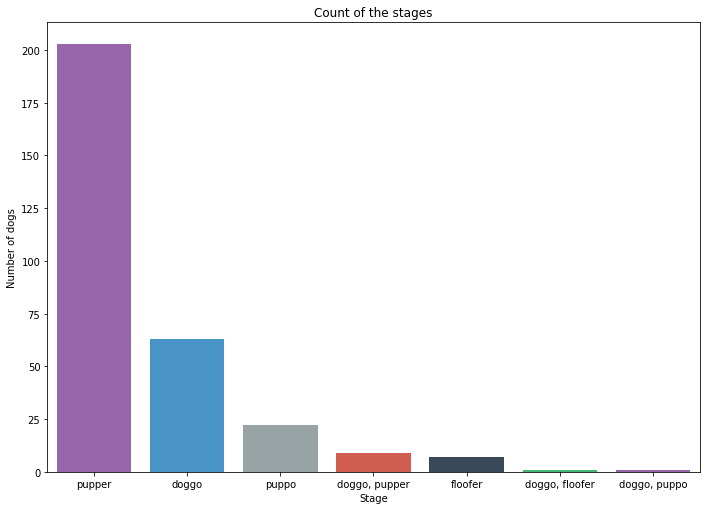

In [254]:
#Plot bar chart for counting stages
plt.figure(figsize=[11.69,8.27]);
sns.barplot(stages_count.index, stages_count.values, palette=color)
plt.title('Count of the stages');
plt.ylabel('Number of dogs');
plt.xlabel('Stage');

There is a big difference in the number of dogs per stage. 84% of the stages are 'none'. Considering those that are classified (there is no stage 'none') 66% are 'pupper', 20% are doggo, 7.5% are 'puppo', 2.3% are 'floofer' and and the rest is classified as with 2 stages.

* Checking the average values for each stage:

In [255]:
stages = df_clean.groupby('stages')

In [256]:
stages[numeric_columns].mean()

,rating,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
stages,,,,,,,,,
doggo,1.188889,11.888889,10.000000,1.285714,0.577058,0.157341,0.062083,7125.698413,19356.380952
"doggo, floofer",1.100000,11.000000,10.000000,1.000000,0.354733,0.177538,0.131706,3433.000000,17169.000000
"doggo, pupper",1.100000,11.000000,10.000000,1.111111,0.833500,0.082893,0.027889,4083.444444,12533.111111
"doggo, puppo",1.300000,13.000000,10.000000,1.000000,0.321676,0.115138,0.096100,19196.000000,47844.000000
floofer,1.200000,12.000000,10.000000,1.142857,0.609204,0.155319,0.047997,4968.714286,13206.000000
none,1.180085,12.495853,10.628555,1.191943,0.590568,0.134187,0.060981,2577.957346,8478.924763
pupper,1.071429,10.714286,10.000000,1.251232,0.604692,0.130573,0.056709,2363.581281,7197.738916
puppo,1.200000,12.000000,10.000000,1.454545,0.722293,0.135468,0.043701,6473.954545,21582.090909


The rating do not show significant differences by stages.

Considering only the unique stages, the 'puppo' stage has the highest average of favorites count, and the 'doggo' stage has the highest average retweet count.

### How are the results of the algorithms p1, p2 and p3 compared to each other?


* Checking the number of cases where each algorithm identified a dog in the image:

In [257]:
ps_dogs = ['p1_dog','p2_dog','p3_dog']
df_clean[ps_dogs].sum()

p1_dog    1477.0
p2_dog    1495.0
p3_dog    1446.0
dtype: float64

The p2 algorithm was the one that identified the largest number of dogs, 1495. Followed by p1 with 1477 and p3 with 1446. This metric slightly differentiated the efficiency of the algorithms, but the difference between them was not very large.


* Checking the average confidence of each algorithm:

In [258]:
ps_confs = ['p1_conf','p2_conf','p3_conf']
df_clean[ps_confs].mean()

p1_conf    0.593941
p2_conf    0.134419
p3_conf    0.060248
dtype: float64

The p1 algorithm is the one with the highest average confidence, around 59%. The p2 and p3 algorithms have an average confidence of approximately 13% and 6%, respectively. This metric was able to quite distinguish the supposed efficiency of the algorithms, p1 being reasonably efficient, and p2 and p3 relatively inefficient.

* Checking the total number of dog breeds identified by the algorithms:

In [259]:
len(df_clean.query('p1_dog == True')['p1'].unique())

111

In [260]:
len(df_clean.query('p2_dog == True')['p2'].unique())

113

In [261]:
len(df_clean.query('p3_dog == True')['p3'].unique())

116

The algorithms p1, p2 and p3, identified 111,113 and 116 different breeds of dogs respectively.

### References

UDACITY - Data Analyst Nanodegree Program: https://www.udacity.com/course/data-analyst-nanodegree--nd002

StackOverflow: https://stackoverflow.com/questions/21104592/json-to-pandas-dataframe

WeRateDogs, Twitter profile (@dog_rates): https://twitter.com/dog_rates/status/749981277374128128